In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
url = 'https://baseball-data.com/17/team/standings.html'
html = requests.get(url)
soup = BeautifulSoup(html.text,'html.parser')

In [7]:
t1 = soup.find_all("table")[0]

In [10]:
r1 = t1.findAll('tr')

In [31]:
import pandas as pd
import time

In [13]:
lst = pd.read_html(url, flavor='bs4')

In [14]:
t1 = lst[0]

In [28]:
url_base = 'https://baseball-data.com/{year}/team/standings.html'
filename_base = 'table_{year}_{league}.csv'

In [26]:
for y in range(20):
    url = url_base.format(year=y+11)
    print(url)
    lst = pd.read_html(url, flavor='bs4')

https://baseball-data.com/11/team/standings.html
https://baseball-data.com/12/team/standings.html
https://baseball-data.com/13/team/standings.html
https://baseball-data.com/14/team/standings.html
https://baseball-data.com/15/team/standings.html
https://baseball-data.com/16/team/standings.html
https://baseball-data.com/17/team/standings.html
https://baseball-data.com/18/team/standings.html
https://baseball-data.com/19/team/standings.html
https://baseball-data.com/20/team/standings.html
https://baseball-data.com/21/team/standings.html
https://baseball-data.com/22/team/standings.html
https://baseball-data.com/23/team/standings.html
https://baseball-data.com/24/team/standings.html
https://baseball-data.com/25/team/standings.html
https://baseball-data.com/26/team/standings.html
https://baseball-data.com/27/team/standings.html
https://baseball-data.com/28/team/standings.html
https://baseball-data.com/29/team/standings.html
https://baseball-data.com/30/team/standings.html


In [51]:
for y in range(10):
    year = y + 11
    url = url_base.format(year=year)
    
    # テーブルを抽出
    lst = pd.read_html(url, flavor='bs4')
    
    # セ・リーグ
    table = lst[0]
    filename = filename_base.format(year=year+2000,league='s')
    table.to_csv('./data/'+filename)
    
    # パ・リーグ
    table = lst[1]
    filename = filename_base.format(year=year+2000,league='p')
    table.to_csv('./data/'+filename)
    
    time.sleep(1)

In [52]:
d1 = pd.read_csv('./data/table_2011_s.csv',index_col=0)
d2 = pd.read_csv('./data/table_2011_p.csv',index_col=0)

In [53]:
d1['ptg']=d1['得点']**2/(d1['得点']**2+d1['失点']**2)
d2['ptg']=d2['得点']**2/(d2['得点']**2+d2['失点']**2)

In [54]:
d1 = d1.drop(columns=['順位','試合','勝利','敗北','引分','差','首位差','残試合','貯金','連勝連敗','得点','平均得点','失点','平均失点','得失点差','打率','本塁打','盗塁','防御率'])

In [55]:
d2 = d2.drop(columns=['順位','試合','勝利','敗北','引分','差','首位差','残試合','貯金','連勝連敗','得点','平均得点','失点','平均失点','得失点差','打率','本塁打','盗塁','防御率'])

In [57]:
d1['year'] = 2011
d2['year'] = 2011

In [58]:
dc = pd.concat([d1,d2])

In [121]:
colors = pd.DataFrame({'チーム':['巨人','阪神','中日','横浜','広島','ヤクルト','ソフトバンク','ロッテ','西武','楽天','日本ハム','オリックス'],'color':['#FF7820','#FFE100','#003595','#0052CD','#E50012','#96c800','#FBC700','#000000','#2C9FE8','#870010','#C8B88C','#9E751E']})

In [87]:
df = pd.DataFrame(index=[], columns=['チーム','勝率','ptg','year'])

for y in range(10):
    year = y + 11
    
    # セ・リーグ
    filename = filename_base.format(year=year+2000,league='s')
    d1 = pd.read_csv('./data/'+filename, index_col=0)
    d1['ptg']=d1['得点']**2/(d1['得点']**2+d1['失点']**2)
    d1 = d1.drop(columns=['順位','試合','勝利','敗北','引分','差','首位差','残試合','貯金','連勝連敗','得点','平均得点','失点','平均失点','得失点差','打率','本塁打','盗塁','防御率'])
    d1['year'] = year+2000
    df = pd.concat([df,d1])
    
    # パ・リーグ
    filename = filename_base.format(year=year+2000,league='p')
    d1 = pd.read_csv('./data/'+filename, index_col=0)
    d1['ptg']=d1['得点']**2/(d1['得点']**2+d1['失点']**2)
    d1 = d1.drop(columns=['順位','試合','勝利','敗北','引分','差','首位差','残試合','貯金','連勝連敗','得点','平均得点','失点','平均失点','得失点差','打率','本塁打','盗塁','防御率'])
    d1['year'] = year+2000
    df = pd.concat([df,d1])

In [64]:
import matplotlib.pyplot as plt
import japanize_matplotlib

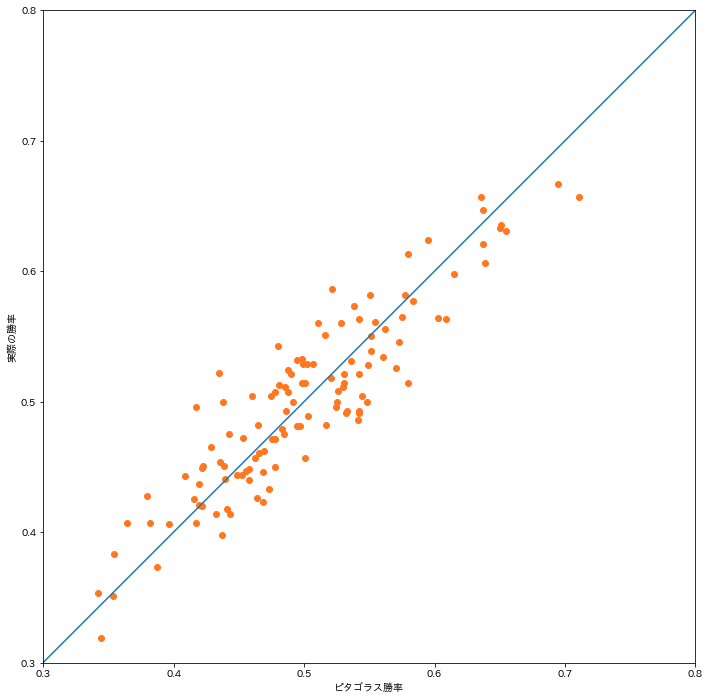

In [74]:
# プロット
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, xlabel='ピタゴラス勝率', ylabel='実際の勝率', xlim=(0.3,0.8), ylim=(0.3,0.8))

ax.scatter(df['ptg'], df['勝率'], c='#FF7820')

ax.plot([0,1], [0,1])

ax.set_aspect('equal')

fig.savefig('3-2_a.png')

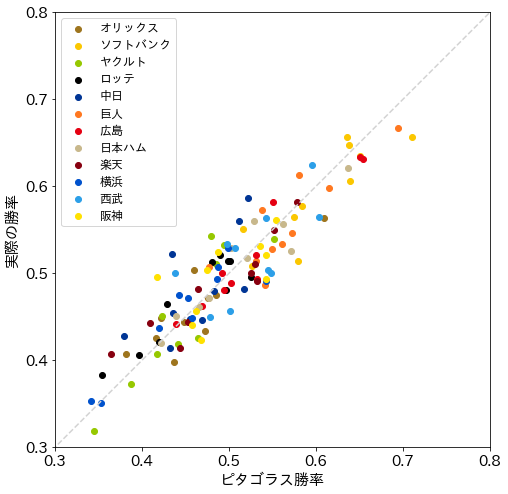

In [141]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, xlabel='ピタゴラス勝率', ylabel='実際の勝率', xlim=(0.3,0.8), ylim=(0.3,0.8))

for name, group in df.groupby('チーム'):
    ax.scatter(group['ptg'], group['勝率'], c=colors[colors['チーム']==name]['color'].values[0], label=name)

ax.plot([0,1], [0,1], linestyle = "--", c='lightgrey')

ax.set_aspect('equal')
ax.legend(fontsize=12)
ax.set_xlabel('ピタゴラス勝率', size=15)
ax.set_ylabel('実際の勝率', size=15)
plt.tick_params(labelsize=15)
fig.savefig('ptg1.png')

In [129]:
df['dif']=abs(df['勝率']-df['ptg'])

In [135]:
difmax = df['dif'].idxmax()

In [102]:
print(df['チーム'].value_counts())

ソフトバンク    10
阪神        10
横浜        10
巨人        10
ヤクルト      10
西武        10
日本ハム      10
広島        10
ロッテ       10
楽天        10
中日        10
オリックス     10
Name: チーム, dtype: int64


In [101]:
df.replace('DeNA','横浜',inplace=True)

In [134]:
df.reset_index(inplace=True, drop=True)

In [89]:
print(df)

      チーム     勝率       ptg  year
0      中日  0.560  0.510855  2011
1    ヤクルト  0.543  0.479765  2011
2      巨人  0.534  0.560587  2011
3      阪神  0.493  0.542087  2011
4      広島  0.441  0.439263  2011
..    ...    ...       ...   ...
1     ロッテ  0.513  0.480858  2020
2      西武  0.500  0.437622  2020
3      楽天  0.491  0.532403  2020
4    日本ハム  0.461  0.465760  2020
5   オリックス  0.398  0.436696  2020

[120 rows x 4 columns]


In [136]:
df.to_csv('df.csv')